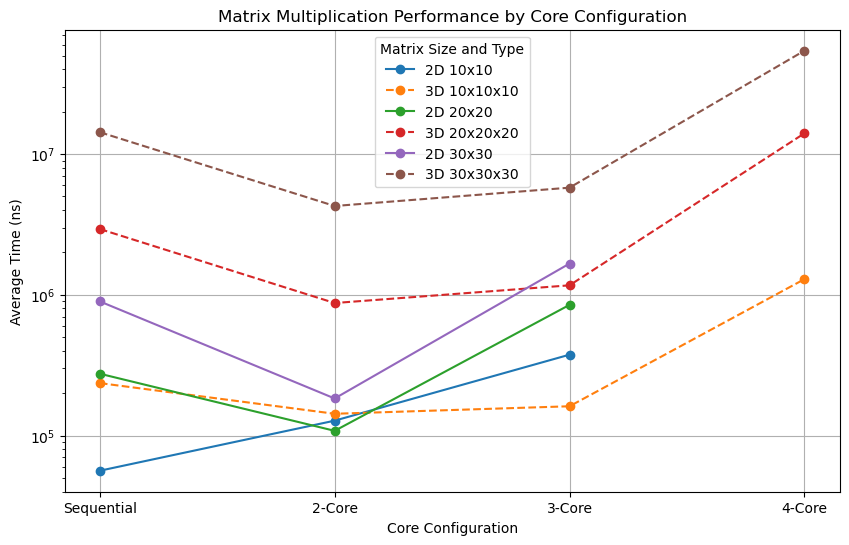

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV, assuming the first row is the header
data_df = pd.read_csv('results.csv')

# Define core configurations
cores = ['Sequential', '2-Core', '3-Core', '4-Core']

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot data for each dimension
for dimension in data_df['Dimension'].unique():
    # Extract data for the current dimension for both 2D and 3D types
    data_2d_current = data_df[(data_df['Type'] == '2D') & (data_df['Dimension'] == dimension)]
    data_3d_current = data_df[(data_df['Type'] == '3D') & (data_df['Dimension'] == dimension)]

    if not data_2d_current.empty:
        # Prepare the y-values for plotting for 2D data
        y_2d = data_2d_current[['Sequential', '2-Core', '3-Core']].iloc[0]
        # Plot 2D data
        plt.plot(cores[:3], y_2d, marker='o', label=f'2D {dimension}x{dimension}')
    
    if not data_3d_current.empty:
        # Prepare the y-values for plotting for 3D data
        y_3d = data_3d_current[['Sequential', '2-Core', '3-Core', '4-Core']].iloc[0]
        # Plot 3D data
        plt.plot(cores, y_3d, marker='o', linestyle='--', label=f'3D {dimension}x{dimension}x{dimension}')

# Configure the plot
plt.xlabel('Core Configuration')
plt.ylabel('Average Time (ns)')
plt.yscale('log')
plt.title('Matrix Multiplication Performance by Core Configuration')
plt.legend(title="Matrix Size and Type")
plt.xticks(cores)  # Ensure x-axis ticks match core configurations
plt.grid(True)
plt.show()
